# Modelos de classificação de risco do Covid-19

Francisco Rosa Dias de Miranda

PREDICT-ICMC

Universidade de São Paulo

In [1]:
import pandas as pd
from pycaret.classification import *

## Leitura dos Dados

Vamos utilizar nesse exemplo uma amostra com 30.000 observações de pacientes internados no estado de São Paulo entre 28/02/2020 e 31/07/2021, já pré-processada. A proporção de óbitos no conjunto de dados está na proporção 70:30, para termos dados menos desbalanceados.

In [2]:
dados = pd.read_csv("https://github.com/predict-icmc/covid19/raw/master/leitura-dados/ae.csv")
dados.head()

,Unnamed: 0,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down,idade,obito,FEMININO,IGNORADO,INDEFINIDO,MASCULINO
0,371454,0,0,0,0,0,0,0,0,0,1,0,0,0,76.0,1,0,0,0,1
1,2441254,0,0,0,0,0,1,0,0,0,0,0,0,0,86.0,1,1,0,0,0
2,2926915,0,0,0,0,0,0,0,0,0,0,0,0,0,42.0,1,0,0,0,1
3,2510490,0,1,1,0,0,0,0,0,0,1,0,0,0,73.0,1,1,0,0,0
4,791890,0,1,1,0,0,0,1,0,0,1,0,0,0,75.0,1,0,0,0,1


In [3]:
# drop columns that are not needed
drop = ['Unnamed: 0','IGNORADO', 'INDEFINIDO', 'MASCULINO']
dados = dados.drop(drop, axis=1)

## Data splitting

Vamos dividir nossos dados em treino e teste, este último contendo 80% da amostra. Esse passo não é necessário, mas faremos para testar nosso classificador.

In [4]:
# split 20% of amos_aleat to test and 80% to train
test = dados.sample(frac=0.2, random_state=42)
train = dados.drop(test.index)

## Definição dos atributos

O dicionário de dados para este conjunto pode ser encontrado em:

Utilizaremos os fatores de risco como variáveis categóricas e a idade como variável numérica.

Nossa variável resposta é `óbito`.

In [5]:
categorical = ['asma', 'cardiopatia', 'diabetes', 'doenca_hematologica', 'doenca_hepatica',
'doenca_neurologica', 'doenca_renal', 'imunodepressao', 'obesidade', 'outros_fatores_de_risco',
'pneumopatia','puerpera','sindrome_de_down', "FEMININO"]

numeric = ['idade']

In [6]:
train

,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down,idade,obito,FEMININO
0,0,0,0,0,0,0,0,0,0,1,0,0,0,76.0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,86.0,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,42.0,1,0
3,0,1,1,0,0,0,0,0,0,1,0,0,0,73.0,1,1
4,0,1,1,0,0,0,1,0,0,1,0,0,0,75.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,0,0,0,0,0,0,0,0,0,0,0,0,0,63.0,0,1
29994,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,0,0
29996,0,0,0,0,0,0,0,0,0,0,0,0,0,45.0,0,1
29997,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0


## Setup

In [7]:
clf = setup(data = train, target='obito', test_data = test,
            categorical_features = categorical,
            numeric_features = numeric,
            remove_multicollinearity = True, 
            feature_selection = True,
            session_id = 4336,
            silent=True,
            preprocess=False)

,Description,Value
0,session_id,4336
1,Target,obito
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(24000, 16)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,14
8,Transformed Train Set,"(24000, 15)"
9,Transformed Test Set,"(6000, 15)"


## Comparando os modelos

In [42]:
# show available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8628,0.9179,0.7298,0.7968,0.7617,0.6657,0.6670,2.7840
catboost,CatBoost Classifier,0.8621,0.9182,0.7213,0.8003,0.7586,0.6625,0.6643,20.5670
lr,Logistic Regression,0.8597,0.9178,0.6925,0.8132,0.7479,0.6516,0.6557,3.4930
lda,Linear Discriminant Analysis,0.8587,0.9178,0.6708,0.8264,0.7404,0.6448,0.6515,0.5440
ridge,Ridge Classifier,0.8570,0.0000,0.6556,0.8331,0.7336,0.6377,0.6464,0.4470
ada,Ada Boost Classifier,0.8560,0.9146,0.6717,0.8167,0.7370,0.6391,0.6450,9.1040
rf,Random Forest Classifier,0.8523,0.9071,0.6907,0.7914,0.7375,0.6354,0.6383,2.2870
et,Extra Trees Classifier,0.8482,0.8934,0.6683,0.7941,0.7257,0.6218,0.6263,2.2320
svm,SVM - Linear Kernel,0.8479,0.0000,0.7266,0.7592,0.7413,0.6338,0.6351,5.2700
dt,Decision Tree Classifier,0.8448,0.8776,0.6534,0.7938,0.7167,0.6112,0.6167,0.4830


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, random_state=4336,
                           subsample=1.0, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False)

## Criando modelo: regressão logística

In [9]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8479,0.9107,0.6828,0.7838,0.7298,0.6247,0.6276
1,0.8550,0.9099,0.6898,0.8006,0.7411,0.6411,0.6446
2,0.8621,0.9147,0.6893,0.8228,0.7502,0.6560,0.6609
3,0.8596,0.9221,0.7032,0.8048,0.7506,0.6535,0.6563
4,0.8642,0.9256,0.7004,0.8211,0.7560,0.6627,0.6667
5,0.8558,0.9176,0.6644,0.8216,0.7347,0.6372,0.6440
6,0.8612,0.9203,0.7032,0.8099,0.7528,0.6570,0.6602
7,0.8642,0.9201,0.6921,0.8275,0.7538,0.6610,0.6660
8,0.8650,0.9190,0.7060,0.8196,0.7586,0.6656,0.6692
9,0.8621,0.9178,0.6935,0.8197,0.7513,0.6568,0.6612


## Tunando o modelo de regressão logística

In [10]:
tuned_lr = tune_model(lr)
print(tuned_lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8479,0.9106,0.6828,0.7838,0.7298,0.6247,0.6276
1,0.8554,0.9099,0.6911,0.8010,0.7420,0.6423,0.6457
2,0.8629,0.9149,0.6907,0.8245,0.7517,0.6580,0.6630
3,0.8608,0.9223,0.7060,0.8067,0.7530,0.6567,0.6595
4,0.8650,0.9262,0.7032,0.8217,0.7578,0.6650,0.6689
5,0.8562,0.9177,0.6657,0.8219,0.7356,0.6384,0.6451
6,0.8621,0.9206,0.7060,0.8105,0.7546,0.6594,0.6624
7,0.8646,0.9203,0.6949,0.8267,0.7551,0.6625,0.6673
8,0.8654,0.9193,0.7074,0.8199,0.7595,0.6668,0.6703
9,0.8621,0.9180,0.6935,0.8197,0.7513,0.6568,0.6612


LogisticRegression(C=9.363, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4336, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [11]:
evaluate_model(tuned_lr)

,Parameters
C,9.363
class_weight,{}
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


## Previsões dentro da amostra de treino

In [12]:
predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8598,0.9174,0.6985,0.8053,0.7481,0.6517,0.6549


,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down,idade,FEMININO,obito,Label,Score
0,0,0,0,0,0,0,0,0,0,0,0,0,0,53.0,0,1,0,0.7921
1,0,0,0,0,0,0,0,0,0,0,0,0,0,24.0,0,0,0,0.9694
2,0,0,0,0,0,0,0,0,0,0,0,0,0,55.0,0,0,0,0.7670
3,0,0,0,0,0,0,0,0,0,0,0,0,0,50.0,0,0,0,0.8259
4,0,0,0,0,0,0,0,0,0,1,0,0,0,58.0,0,1,1,0.7873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,0,0,0,89.0,0,1,1,0.7842
5996,0,0,0,0,0,0,0,0,0,0,0,0,0,53.0,1,0,0,0.8716
5997,0,0,0,0,0,0,0,0,0,0,0,0,0,43.0,0,0,0,0.8877
5998,0,0,1,0,0,0,0,0,0,0,0,0,0,59.0,0,0,0,0.5636


## Finalizando o modelo

In [13]:
final_tuned_lr = finalize_model(tuned_lr)
print(final_tuned_lr)

LogisticRegression(C=9.363, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4336, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## Avaliando ao modelo

Gráficos disponívels
- ‘auc’ - Area Under the Curve
- ‘threshold’ - Discrimination Threshold
- ‘pr’ - Precision Recall Curve
- ‘confusion_matrix’ - Confusion Matrix
- ‘error’ - Class Prediction Error
- ‘class_report’ - Classification Report
- ‘boundary’ - Decision Boundary
- ‘rfe’ - Recursive Feature Selection
- ‘learning’ - Learning Curve
- ‘manifold’ - Manifold Learning
- ‘calibration’ - Calibration Curve
- ‘vc’ - Validation Curve
- ‘dimension’ - Dimension Learning
- ‘feature’ - Feature Importance
- ‘feature_all’ - Feature Importance (All)
- ‘parameter’ - Model Hyperparameter
- ‘lift’ - Lift Curve
- ‘gain’ - Gain Chart
- ‘tree’ - Decision Tree
- ‘ks’ - KS Statistic Plot


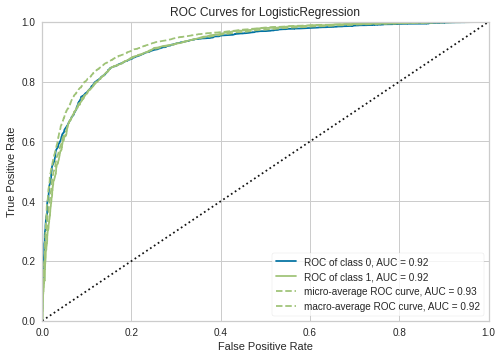

In [19]:
plot_model(final_tuned_lr, 'auc')

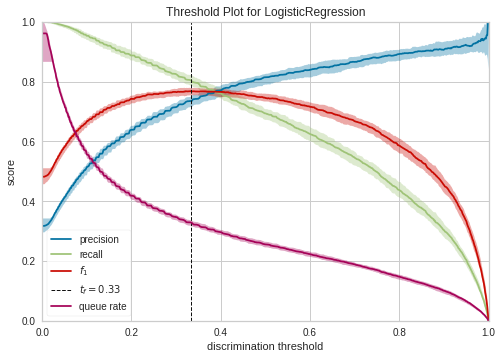

In [20]:
plot_model(final_tuned_lr, 'threshold')

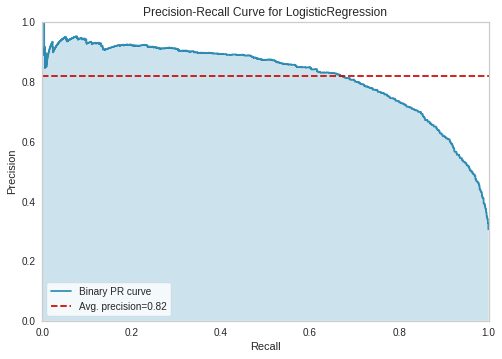

In [21]:
plot_model(final_tuned_lr, 'pr')

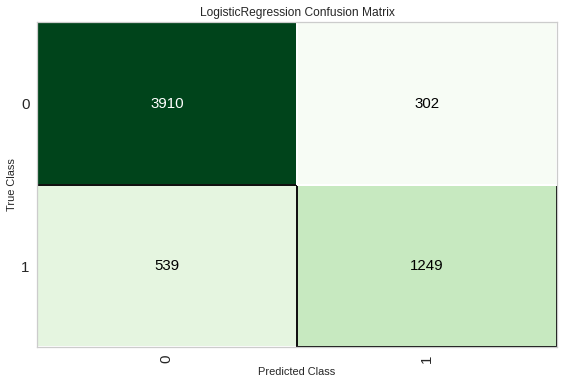

In [22]:
plot_model(final_tuned_lr, 'confusion_matrix')

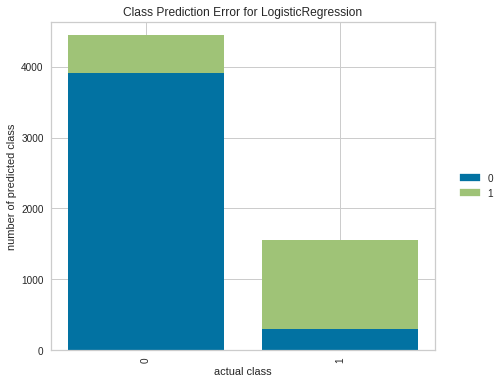

In [23]:
plot_model(final_tuned_lr, 'error')

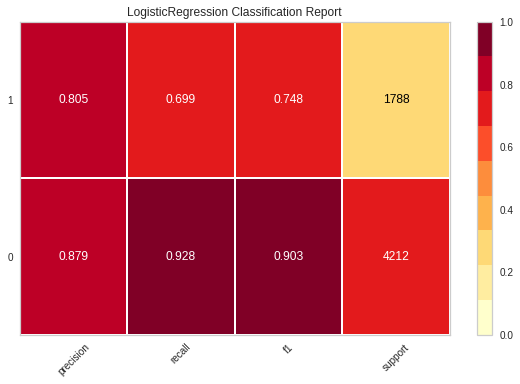

In [24]:
plot_model(final_tuned_lr, 'class_report')

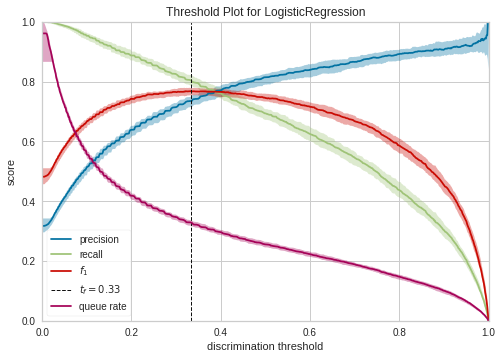

In [29]:
plot_model(final_tuned_lr, 'threshold')

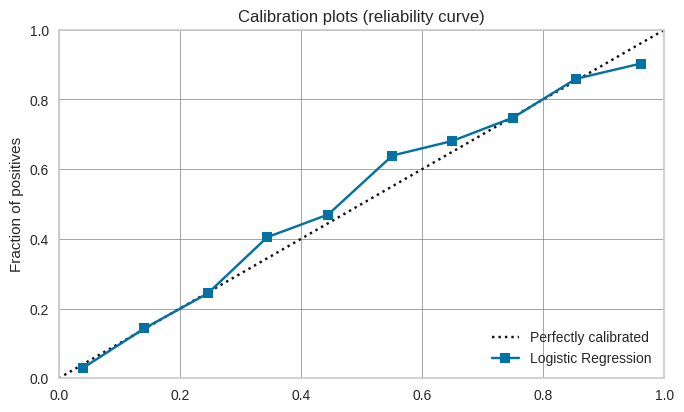

In [33]:
plot_model(final_tuned_lr, 'calibration')

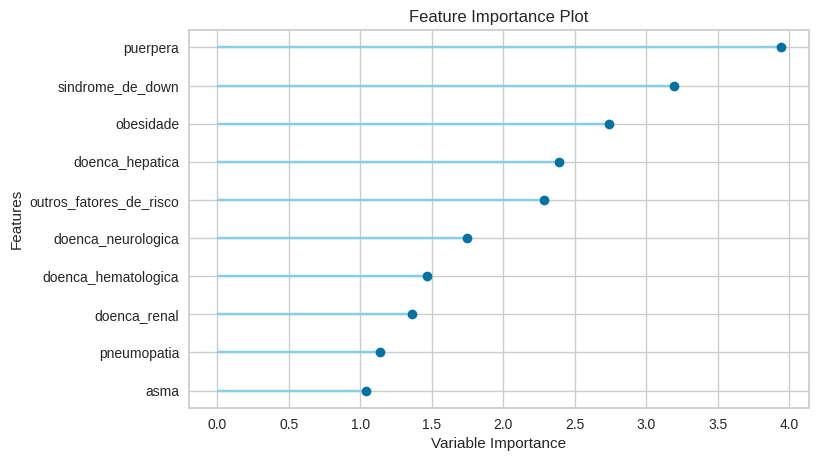

In [36]:
plot_model(final_tuned_lr, 'feature')

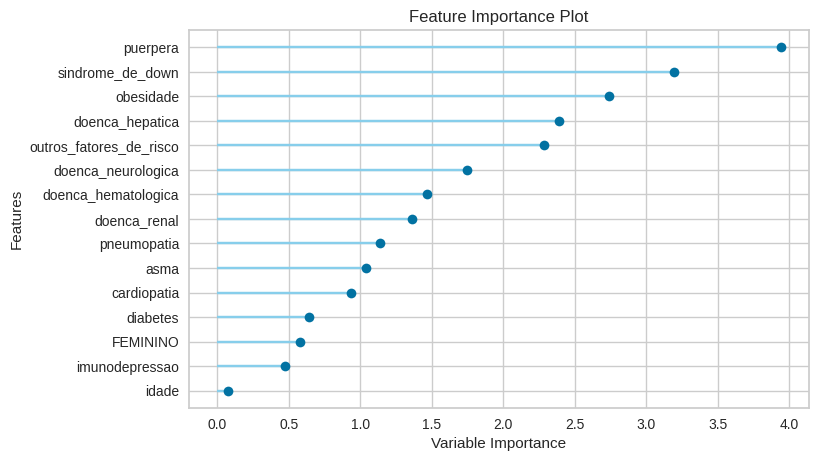

In [37]:
plot_model(final_tuned_lr, 'feature_all')

In [38]:
plot_model(final_tuned_lr, 'parameter')

,Parameters
C,9.363
class_weight,{}
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


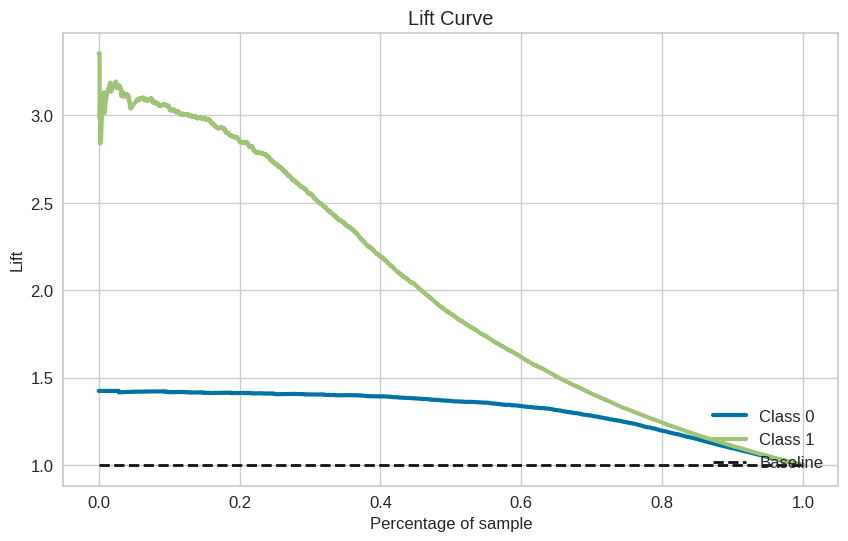

In [39]:
plot_model(final_tuned_lr, 'lift')

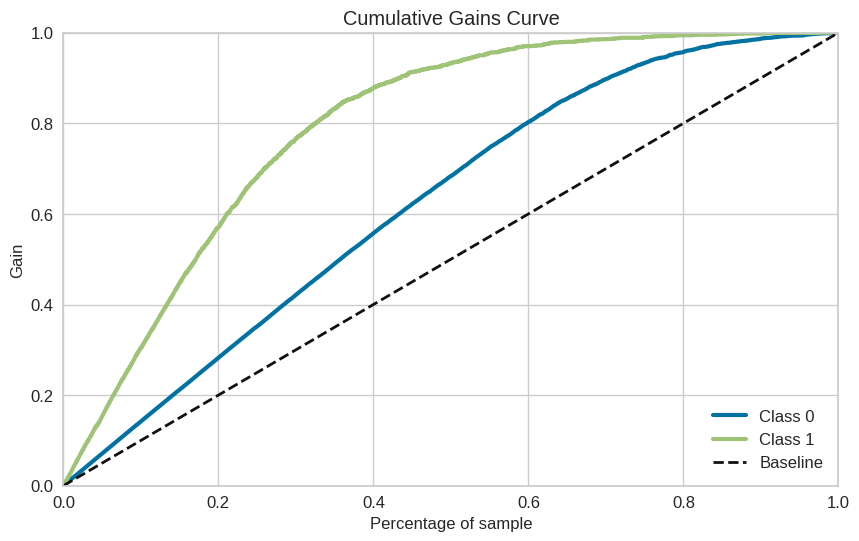

In [40]:
plot_model(final_tuned_lr, 'gain')

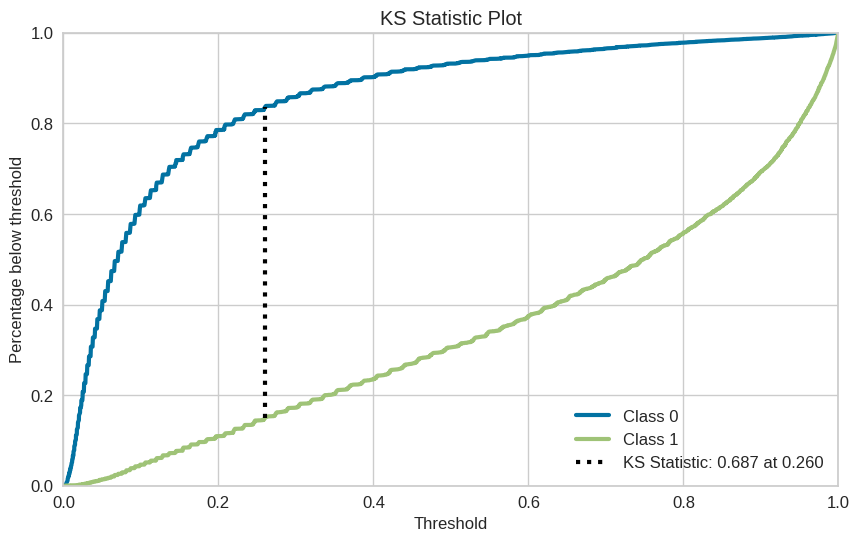

In [41]:
plot_model(final_tuned_lr, 'ks')

## Previsões na amostra de teste

In [14]:
unseen_predictions_ale = predict_model(final_tuned_lr, data=test)
unseen_predictions_ale.tail()

,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down,idade,obito,FEMININO,Label,Score
2210,0,0,0,0,0,0,0,0,0,0,0,0,0,89.0,1,0,1,0.7842
14144,0,0,0,0,0,0,0,0,0,0,0,0,0,53.0,0,1,0,0.8716
23108,0,0,0,0,0,0,0,0,0,0,0,0,0,43.0,0,0,0,0.8877
25703,0,0,1,0,0,0,0,0,0,0,0,0,0,59.0,0,0,0,0.5636
29171,0,0,0,0,0,0,0,0,0,0,0,0,0,21.0,0,1,0,0.9860


## Criando e Interpretando um LightGBM com o SHAP

In [15]:
cat = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8496,0.9075,0.7091,0.7722,0.7394,0.6339,0.6350
1,0.8588,0.9116,0.7244,0.7888,0.7552,0.6562,0.6574
2,0.8621,0.9160,0.7074,0.8095,0.7550,0.6596,0.6625
3,0.8596,0.9231,0.7268,0.7892,0.7567,0.6582,0.6593
4,0.8638,0.9243,0.7143,0.8097,0.7590,0.6646,0.6671
5,0.8638,0.9197,0.6990,0.8208,0.7551,0.6615,0.6656
6,0.8688,0.9216,0.7476,0.8021,0.7739,0.6816,0.6824
7,0.8612,0.9226,0.7184,0.7994,0.7568,0.6601,0.6619
8,0.8679,0.9171,0.7309,0.8108,0.7688,0.6767,0.6785
9,0.8654,0.9181,0.7351,0.8006,0.7664,0.6722,0.6734


In [16]:

tuned_cat = tune_model(cat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8529,0.9097,0.7244,0.7725,0.7477,0.6440,0.6447
1,0.8654,0.9130,0.7493,0.7921,0.7701,0.6751,0.6756
2,0.8671,0.9172,0.7226,0.8141,0.7656,0.6733,0.6756
3,0.8617,0.9242,0.7406,0.7865,0.7629,0.6653,0.6659
4,0.8688,0.9258,0.7420,0.8057,0.7726,0.6805,0.6817
5,0.8633,0.9197,0.7157,0.8075,0.7588,0.6640,0.6663
6,0.8696,0.9222,0.7559,0.7991,0.7769,0.6849,0.6854
7,0.8654,0.9228,0.7295,0.8043,0.7651,0.6711,0.6727
8,0.8688,0.9186,0.7503,0.8003,0.7745,0.6821,0.6828
9,0.8679,0.9200,0.7434,0.8024,0.7718,0.6790,0.6800


In [17]:
final_cat = finalize_model(tuned_cat)

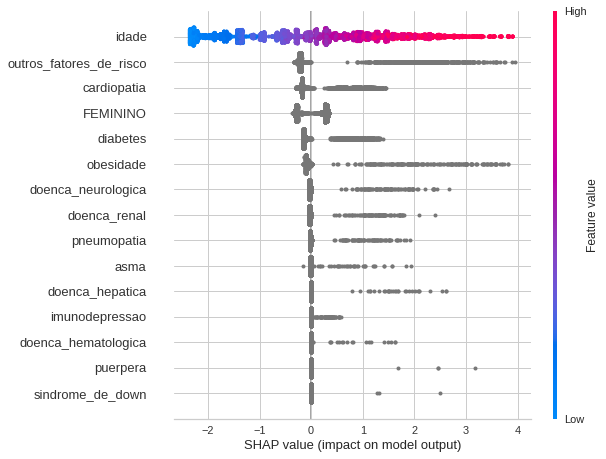

In [18]:
interpret_model(final_cat)

## Referências


- **pycaret.org**. PyCaret, April 2020. URL https://pycaret.org/about. PyCaret version 1.0.0.
